In [1]:
from persistable.persistable import Persistable

from sklearn import datasets
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib ipympl

In [2]:
digits = datasets.load_digits()
data = digits.data
num_samples = data.shape[0]
target = datasets.load_digits().target

from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca_data = pca.fit_transform(data)

/opt/homebrew/Caskroom/miniforge/base/envs/persistable-test-2/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


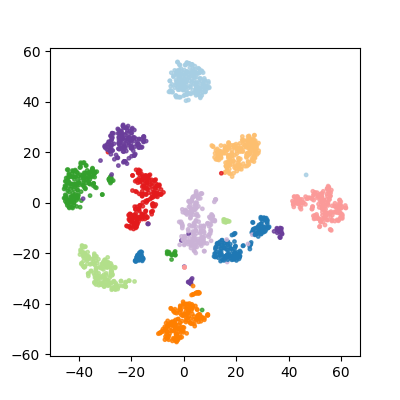

In [3]:
# visualize the true labels using t-SNE

projection = TSNE(random_state=2, init="pca", learning_rate="auto").fit_transform(digits.data)

plt.figure(figsize=(4,4))
plt.scatter(projection.T[0], projection.T[1], s=6, c=np.array(sns.color_palette("Paired", 10))[datasets.load_digits().target], alpha=0.8)
plt.show()

In [4]:
p = Persistable(pca_data)
cl = p.quick_cluster()

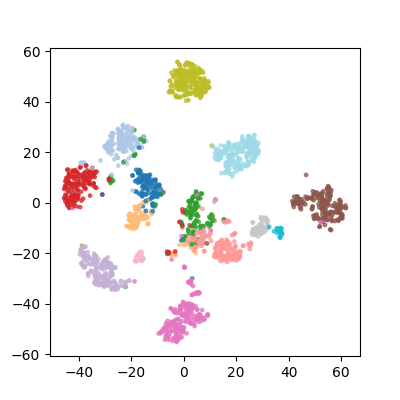

In [5]:
plt.figure(figsize=(4,4))

_ = plt.scatter(projection[cl==-1,0], projection[cl==-1,1], s=2, alpha = 0.1, c = "grey")
_ = plt.scatter(projection[cl!=-1,0], projection[cl!=-1,1], s=6, alpha = 0.7, c = cl[cl!=-1], cmap="tab20")